In [1]:
from grid_env import GridEnv
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import glob
import pickle

def get_latest_folder(base_name):
    index = 1
    while True:
        folder = f"{base_name}_{index}"
        if not os.path.exists(folder):
            folder = f"{base_name}_{index-1}"
            return folder
        index += 1
folder = get_latest_folder("world")

from grid_PTR_model import GridPTRModel
model = GridPTRModel()
checkpoint = torch.load(f"{folder}/models/last_model.pt")
model.load_state_dict(checkpoint)
model.eval()

# iterations
iters = 100000
initial_epsilon = 1.0
eps_anneal_rate = 0.7
alpha= 0.5
gamma = 0.99

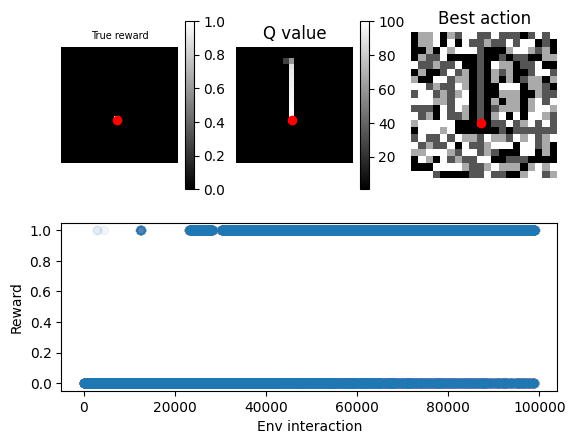

Greediness: 0.4999264043042323


In [2]:
#Create new env with estimated reward and train agent
env_1 = GridEnv(sparse=True)
newQ = env_1.value_iter2(iters=iters, alpha=alpha,gamma=gamma,initial_eps=initial_epsilon, eps_anneal_rate=eps_anneal_rate,disp=True,plot_freq=1000)

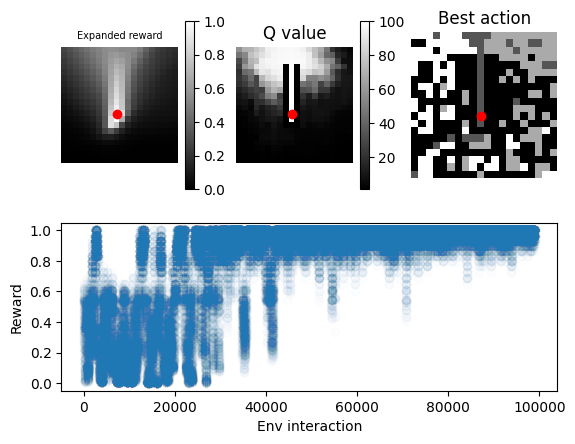

Greediness: 0.2928411807127287


In [3]:
#Create new env with estimated reward and train agent
shrink_factor = 10
env_2 = GridEnv(sparse=False, model=model)
newQ = env_2.value_iter2(iters=iters, alpha=alpha,gamma=gamma,initial_eps=initial_epsilon, eps_anneal_rate=eps_anneal_rate/2,disp=True,plot_freq=1000)

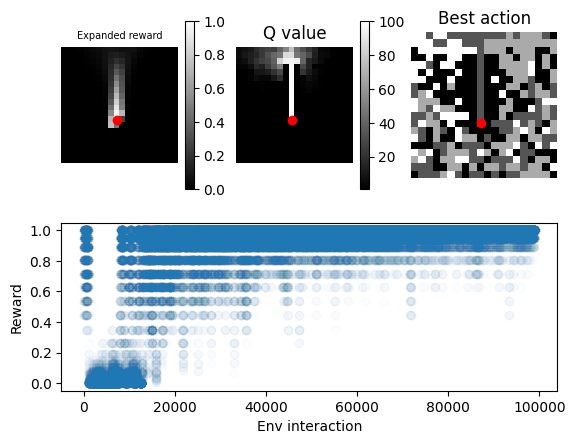

Greediness: 0.4999264043042323


In [4]:
#Create new env with estimated reward and train agent
env_2.shrink_reward(shrink_factor)
newQ = env_2.value_iter2(iters=iters, alpha=alpha,gamma=gamma,initial_eps=initial_epsilon, eps_anneal_rate=eps_anneal_rate,disp=True,plot_freq=1000)

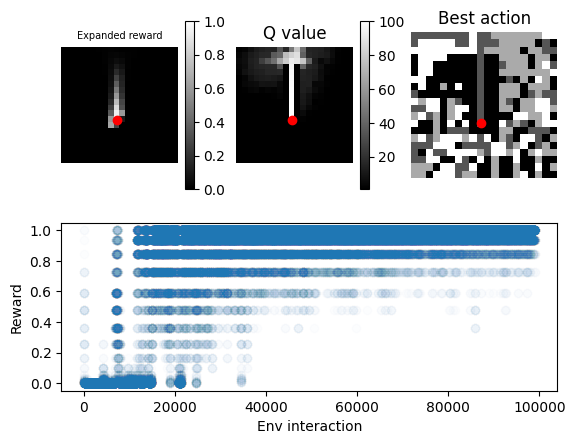

Greediness: 0.4999264043042323


In [5]:
#Create new env with estimated reward and train agent
env_2.shrink_reward(shrink_factor)
newQ = env_2.value_iter2(iters=iters, alpha=alpha,gamma=gamma,initial_eps=initial_epsilon, eps_anneal_rate=eps_anneal_rate,disp=True,plot_freq=1000)

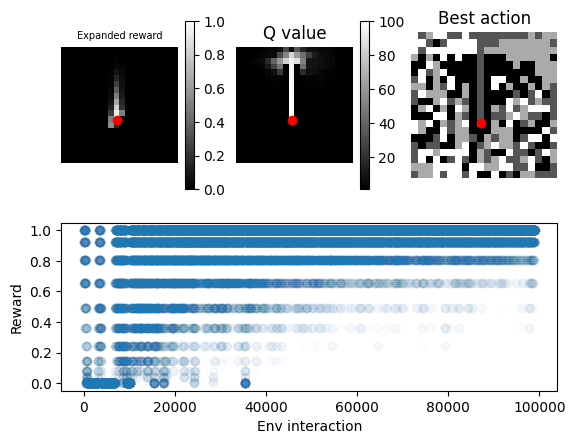

Greediness: 0.4999264043042323


In [6]:
#Create new env with estimated reward and train agent
env_2.shrink_reward(shrink_factor)
newQ = env_2.value_iter2(iters=iters, alpha=alpha,gamma=gamma,initial_eps=initial_epsilon, eps_anneal_rate=eps_anneal_rate,disp=True,plot_freq=1000)